# TUTORIAL <span style="color:orange;">***MASAÏ***</span><img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.png" />

Back to the main [Index](Index.ipynb)

## Part 3. Handling series of 1D spectra

#### Various imports and graphics settings

In [5]:
from __future__ import print_function

#### Loading the <span style="color:orange;">***MASAÏ***</span> library

In [6]:
from masai.api import *

#### Set up the general location of data

In [7]:
masai = os.environ.get('MASAI','.')
# You should set the MASAI environnement variable before running these exemples')
# or change the two following paths according to your installation
DATADIR = os.path.join(masai,'doc/tutorial/exemples')
FIGDIR = os.path.join(masai,'doc/tutorial/figures')

## Load a series of 1D fids

In [8]:
def read():
    """ This function will be call each time we want to reset the data to original """
    expnos = [50,85,105,144,164,184,194]
    expnos.reverse()
    return Bruker(
            data_dir=DATADIR, 
            user = 'user', 
            name = 'SERIES', 
            expnos = expnos,
            varpars = "TE"
          ) 
sources = read()
# print file informations
sources

removed 152
removed 152
removed 152
removed 152
removed 152
removed 152
removed 152
Loaded FIDSER


***Bruker Source***
- path: /Users/christian/Dropbox/PycharmProjects/masai/doc/tutorial/exemples/user/nmr/SERIES
- datatype: 1D NMR FIDSER
- pulse program: zg
- n: 7, TD: 6144
- F1 limits: 224.99 to 335.012 {}
- F2 limits: 0.00 to 92.145 ms

We can check that the various experiments are properly read and stacked in a single 2D array (only the 5 fisrt rows are displayed using the `head()` function)

In [9]:
sources.real.head()

0.000      0.015      0.030      0.045      0.060      0.075   \
224.9870 -12.078691 -20.879722  -9.000152  -7.444616  -4.883248  -4.716552   
244.9878  -9.384140 -16.995561  -7.145717  -4.030292  -1.016278  -0.111965   
259.9952  -8.095404 -12.300335  -0.868080   2.602716   5.201841   5.208370   
274.9956  -7.120038 -10.043088   0.646327   4.951362   6.573925   6.458152   
289.5940 -26.103325 -32.013079  11.175683  25.287583  29.596644  26.068615   

             0.090      0.105      0.120      0.135    ...    92.010  92.025  \
224.9870   0.559170   5.986791  11.764232  13.279835   ...         0       0   
244.9878   3.617253   9.401441  14.092749  15.036778   ...         0       0   
259.9952   9.118863  13.885576  17.380419  15.171592   ...         0       0   
274.9956  10.023829  14.635924  17.295548  14.122889   ...         0       0   
289.5940  36.024330  48.427598  55.067244  38.007160   ...         0       0   

          92.040  92.055  92.070  92.085  92.100  92.115  92.130  92.145  
224.9870       0       0       0       0       0       0       0       0  
244.9878       0       0       0       0       0       0       0       0  
259.9952       0       0       0       0       0       0       0       0  
274.9956       0       0       0       0       0       0       0       0  
289.5940       0       0       0       0       0       0       0       0  

[5 rows x 6144 columns]

## Plots

taking horizontal (axis=1) section by index at index 2



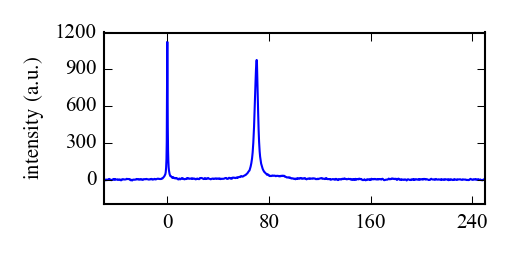

In [13]:
p = Plot1d(sources.get_row(2, byindex=True ))  

## How to process a series of fid?

Exactly the same as a unique spectrum

removed 152
removed 152
removed 152
removed 152
removed 152
removed 152
removed 152
Loaded FIDSER
Exponential apodization lb:50.00
Zero-filling to si:8192
Fourier transform with si:8192
clipping along axis -1
Phasing phc0:140.00, phc1:0.00
Phasing phc0:180.00, phc1:0.00



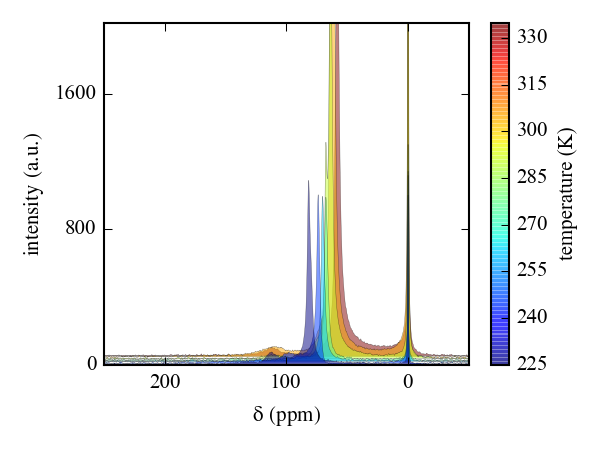

***Bruker Source***
- path: /Users/christian/Dropbox/PycharmProjects/masai/doc/tutorial/exemples/user/nmr/SERIES
- datatype: 1D NMR FIDSER
- pulse program: zg
- n: 7, SI: 4082
- F1 limits: 224.99 to 335.012 {}
- F2 limits: 249.98 to -49.978 ppm



In [22]:
sources = read() # reading this each avoid problem with multiple calls

Process(sources, transform="em 50; zf 0; ft; cl -50 250; pk 140 0 --pivot -0.04") 
Process(sources, 
    transform="""pk 180 0 --pivot -0.04  --ediff 2 --bound_phc0 360 
                --bound_phc1 180 --fit_phc1 --gamma 1 --exp --byrow""")# 

p = Stackplot(sources, offset=.1, figsize=(4,3), ylim=(-1, 2020), ylabel='temperature (K)')
print(sources)

In [23]:
# We wll try here to normalize the xenon spectra relative to the gas pic (-3, 3 ppm)

# make an array of integrals for the gaz pic
id0 = sources.position2index(-3, axis=-1)
id1 = sources.position2index(3, axis=-1)

intg = sources.data.iloc[:, id1:id0].sum(axis=1)
sources.data = (sources.data.T / intg).T
print('gaz signal intensity', intg)

TypeError: 'NoneType' object is not callable

In [ ]:
p = Stackplot(sources, offset=10., figsize=(4,3), ylim=(-.01, 0.2) , ylabel='temperature (K)')

Back to the main [Index](Index.ipynb)